<a href="https://colab.research.google.com/github/VimalChamyal/Linear-Regression/blob/main/Score_prediction_using_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

In [9]:
url = 'https://github.com/VimalChamyal/Score/raw/main/score.csv'

In [10]:
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df.shape

(25, 2)

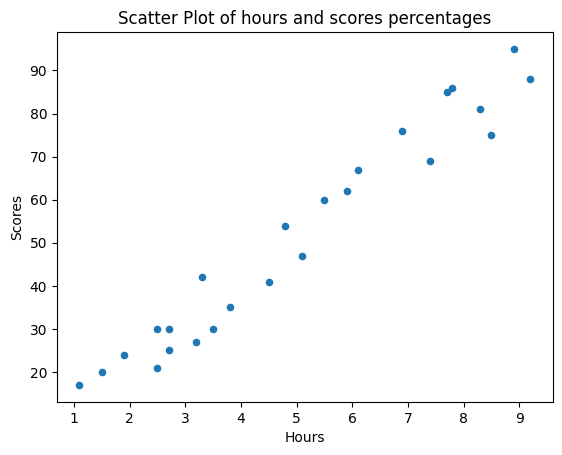

In [14]:
df.plot.scatter(x='Hours', y='Scores', title='Scatter Plot of hours and scores percentages');

# We can see a linear relation between hours and scores

In [16]:
print(df.corr())

# Correlation matrix will quantify the strength of the linear relationship between the variables.

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [17]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Scikit-Learn's linear regression model expects a 2D input

In [19]:
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [22]:
y
# Values are now in a 2D array

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [24]:
#Training a Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [25]:
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
# We can check the intercept and slope by printing the regressor.intecept_ and regressor.coef_ attributes

print(regressor.intercept_)

print(regressor.coef_)

[1.7557382]
[[9.74054996]]


SCORE = 9.74054996 * hours + 1.7557382

In [27]:
# To predict new values using our model is to call on the predict() function

score = regressor.predict([[9.5]])
print(score)

[[94.29096281]]


To make predictions on the test data, we pass the X_test values to the predict() method.

y_pred = regressor.predict(X_test)

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

# Squeeze():converts a single column DataFrame into a Series.
# Series:It is a one-dimensional array holding data of any type.

   Actual  Predicted
0      95  88.446633
1      86  77.732028
2      17  12.470343
3      69  73.835808
4      42  33.899553


In [31]:
#Evaluating the Model

import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 6.46
Mean squared error: 44.17
Root mean squared error: 6.65


In [32]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: [0.94664491]
